In [4]:
import torch
import torch.nn as nn
import scipy.io
import numpy as np
import os
import glob
import json
import pandas as pd
import os
from pandas.io.json import json_normalize


In [2]:
mat = scipy.io.loadmat("./MATLAB_SO3/datasets_matrices/Ellis_Island.mat")
Z_incomplete = mat['Z_incomplete']
Omega = mat["Omega"]
data = []
for i in range(0 , Z_incomplete.shape[0] , 3):
    for j in range(0 , Z_incomplete.shape[0] , 3):
        if(Omega[i][j]==1 ):
            data.append([i , j])

In [7]:
gt_path = "./datasets/mat-cmpl/gt.pt"
torch.save(torch.from_numpy(Z_incomplete), gt_path)


array([[ 1.00000000e+00, -4.59913357e-12, -8.46950288e-12, ...,
         9.27921250e-01,  9.02817924e-02,  3.61678520e-01],
       [-4.59913357e-12,  1.00000000e+00,  2.00914285e-12, ...,
        -1.52962302e-01,  9.77001536e-01,  1.48561547e-01],
       [-8.46950288e-12,  2.00914285e-12,  1.00000000e+00, ...,
        -3.39948067e-01, -1.93176595e-01,  9.20390197e-01],
       ...,
       [ 9.27921250e-01, -1.52962302e-01, -3.39948067e-01, ...,
         1.00000000e+00,  5.46229728e-14, -2.94209102e-14],
       [ 9.02817924e-02,  9.77001536e-01, -1.93176595e-01, ...,
         5.46229728e-14,  1.00000000e+00,  9.40247880e-13],
       [ 3.61678520e-01,  1.48561547e-01,  9.20390197e-01, ...,
        -2.94209102e-14,  9.40247880e-13,  1.00000000e+00]])

In [8]:
x =[]
y = []
for idx in data:
    for i in range(3):
        for j in range(3):
            x.append(idx[0]+i)
            y.append(idx[1]+j)
x = torch.tensor(x)
y = torch.tensor(y)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [29]:
ys_ = Z_incomplete[x , y]
ys_ = torch.tensor(ys_)
obs_path = "./datasets/mat-cmpl/362223.pt"
torch.save([(x, y), ys_], obs_path)

In [7]:
for dir in glob.glob("./logs/*"):
    num  = int(dir.split('/')[-1])
    if num<=47:
        continue
    mat_dir = os.path.join(dir , "best.npy")
    new_file_dir = os.path.join(dir , "X_output.mat")
    mat = torch.load(mat_dir).detach().cpu().numpy()
    ndic = {'data':mat}
    scipy.io.savemat(new_file_dir , ndic)
    config_path = os.path.join(dir, "config.toml")
    with open(config_path) as f:
        lines = f.readlines()
    depth = int(lines[3].strip('\n').split("= ")[1])
    init_scale = float(lines[7].strip('\n').split("= ")[1])
    optimizer = lines[10].strip('\n').split("= ")[1].replace('"', '')
    initialization  = lines[11].strip('\n').split("= ")[1].replace('"','')
    lr = float(lines[12].strip('\n').split("= ")[1])
    config_dic = {"depth":depth , "init_scale": init_scale , "optimizer":optimizer , "initialization":initialization , "lr":lr}
    json_path = os.path.join(dir , "config.json")
    with open(json_path, 'w') as fp:
        json.dump(config_dic, fp)

In [6]:
df= []
idx = 0 
for dir in glob.glob("./exps/*"):
    file_path = os.path.join(dir , "config.json")
    try:
        f = open(file_path)
        data = json.load(f)
        norm_data = pd.DataFrame(json_normalize(data))
        norm_data.insert(0, 'Exp', '')
        norm_data['Exp'] = idx
        idx+=1
        df.append(norm_data)
    except:

        print(dir , "Fail")
dataframe = pd.concat(df)

./exps/5 Fail


ipykernel_launcher:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [7]:
dataframe

,Exp,depth,init_scale,optimizer,initialization,lr,dataset,delta,mean_error,median_error
0,0,2,0.001,GroupRMSprop,orthogonal,0.001,Gendarmenmarkt,0.5,61.54250,33.17510
0,1,2,0.001,GroupRMSprop,orthogonal,0.001,Piccadilly,0.5,34.13690,14.83550
0,2,2,0.001,GroupRMSprop,orthogonal,0.001,Notre_Dame,0.5,NaN,NaN
0,3,2,0.001,GroupRMSprop,orthogonal,0.001,Union_Square,0.5,NaN,NaN
0,4,2,0.001,GroupRMSprop,orthogonal,0.001,Yorkminster,0.5,NaN,NaN
0,5,2,0.001,GroupRMSprop,orthogonal,0.001,Roman_Forum,0.5,23.38940,15.97140
0,6,2,0.001,GroupRMSprop,orthogonal,0.001,Montreal_Notre_Dame,0.5,NaN,NaN
0,7,2,0.001,GroupRMSprop,orthogonal,0.001,Piazza_del_Popolo,0.5,19.91440,2.16252
0,8,2,0.001,GroupRMSprop,orthogonal,0.001,Alamo,0.5,11.38860,2.24468
0,9,2,0.001,GroupRMSprop,orthogonal,0.001,NYC_Library,0.5,9.53183,4.41624


In [7]:
dataframe.to_csv("./results.csv")

In [2]:
datasets = os.listdir("./MATLAB_SO3_Tejus/datasets_matrices")

In [8]:
path = "./MATLAB_SO3_Tejus/datasets_matrices"
for dir in datasets:
    mat_path = os.path.join(path , dir)
    name = dir.split(".mat")[0]
    if(name == "Ellis_Island"):
        continue
    mat = scipy.io.loadmat(mat_path)
    Z_incomplete = mat['Z_incomplete']
    Omega = mat["Omega"]
    data = []
    for i in range(0, Z_incomplete.shape[0], 3):
        for j in range(0, Z_incomplete.shape[0], 3):
            if(Omega[i][j] == 1):
                data.append([i, j])
    save_path = "./datasets/mat-cmpl/" 
    final_path = os.path.join(save_path , name+"_gt.pt")
    torch.save(torch.from_numpy(Z_incomplete), final_path)
    x =[]
    y = []
    for idx in data:
        for i in range(3):
            for j in range(3):
                x.append(idx[0]+i)
                y.append(idx[1]+j)
    x = torch.tensor(x)
    y = torch.tensor(y)
    ys_ = Z_incomplete[x , y]
    ys_ = torch.tensor(ys_)
    obs_path = os.path.join(save_path , name+"_obs.pt")
    torch.save([(x, y), ys_], obs_path)

    


In [42]:
path = "./MATLAB_SO3_Tejus/datasets_matrices"
datasets = os.listdir("./MATLAB_SO3_Tejus/datasets_matrices")
for dir in datasets:

    name = dir.split(".mat")[0]
    if(name =="Ellis_Island"):
        continue
    print(name)
    data = []
    data.append("problem = \"matrix-completion\" \n")
    gt_path = os.path.join("datasets/mat-cmpl/", name+"_gt.pt")
    data.append(f"gt_path = \"{gt_path}\" \n")
    x = torch.load(gt_path)
    data.append(f"shape = [{x.shape[0]}, {x.shape[0]}] \n")
    obs_path =  os.path.join("datasets/mat-cmpl/", name+"_obs.pt")
    data.append(f"obs_path = \"{obs_path}\" \n")
    data.append(f"dataset = \"{name}\" \n")
    file_path = os.path.join("./configs/mat-cmpl/" , name+".toml")
    file1 = open(file_path,"w")
    file1.writelines(data)
    file1.close()


Trafalgar
Tower_of_London
Union_Square
NYC_Library
Yorkminster
Alamo
Montreal_Notre_Dame
Piazza_del_Popolo
Roman_Forum
Gendarmenmarkt
Notre_Dame
Madrid_Metropolis
Piccadilly


In [1]:
import scipy.io
import numpy as np
from scipy.sparse.linalg import eigsh
import os


def SO3_EIG(pred_path, gt_path, log_dir):
    mat = scipy.io.loadmat(gt_path)
    ncams_c = mat['ncams_c'][0][0]
    R_gt_c = mat['R_gt_c']
    A = np.ones((ncams_c, ncams_c))
    G = scipy.io.loadmat(pred_path)['best']

    D = np.kron(np.diag(1.0/np.sum(A, 1)), np.eye(3))
    M = eigsh(np.matmul(D, G),  k=3)[1]
    M[:, [0, 2]] = M[:, [2, 0]]

    R = np.zeros((3, 3, ncams_c))

    for i in range(ncams_c):
        U, s, V = np.linalg.svd(M[3*i:3*i + 3, :])
        R[:, :, i] = np.matmul(U, V.T)
        if (np.linalg.det(R[:, :, i]) < 0):
            R[:, :, i] -= np.matmul(U, V.T)

    data = {'data': R}
    scipy.io.savemat(os.path.join(log_dir, "R_our.mat"), data)


In [5]:
gt_path = "./MATLAB_SO3/datasets_matrices/Tower_of_London.mat"
pred_path = "./exp_huber/2/X_output.mat"
mat = scipy.io.loadmat(gt_path)
ncams_c = mat['ncams_c'][0][0]
R_gt_c = mat['R_gt_c']
A = np.ones((ncams_c, ncams_c))
G = scipy.io.loadmat(pred_path)['best']

D = np.kron(np.diag(1.0/np.sum(A, 1)), np.eye(3))
M = eigsh(np.matmul(D, G),  k=3)[1]
M[:, [0, 2]] = M[:, [2, 0]]

R = np.zeros((3, 3, ncams_c))

for i in range(ncams_c):
    U, s, V = np.linalg.svd(M[3*i:3*i + 3, :])
    R[:, :, i] = np.matmul(U, V.T)
    if (np.linalg.det(R[:, :, i]) < 0):
        R[:, :, i] -= np.matmul(U, V.T)

data = {'data': R}
# scipy.io.savemat(os.path.join(log_dir, "R_our.mat"), data)


In [32]:
i = 0
M = eigsh(np.matmul(D, G),  k=3)[1]
M[:, [0, 2]] = M[:, [2, 0]]
U, s, V = np.linalg.svd(M[3*i:3*i + 3, :])
V = V.T.conj()


In [33]:
np.matmul(U , V.T)

array([[-0.88330578,  0.46868581,  0.01022322],
       [-0.02244464, -0.06406235,  0.99769347],
       [-0.46825969, -0.88103895, -0.06710613]])

In [38]:
M = eigsh(np.matmul(D, G),  k=3)[1]
M[:, [0, 2]] = M[:, [2, 0]]


In [2]:
import torch
import numpy as np

In [2]:
import torch
import matplotlib.pyplot as plt

(array([1.20000e+01, 2.50000e+01, 6.40000e+01, 9.40000e+01, 3.90000e+01,
        1.40000e+01, 3.20000e+01, 3.30000e+01, 5.40000e+01, 9.80000e+01,
        1.36000e+02, 5.73000e+02, 1.79800e+03, 2.27400e+03, 2.95600e+03,
        3.01600e+03, 3.78000e+03, 4.64500e+03, 4.46000e+03, 5.82400e+03,
        6.96300e+03, 9.37600e+03, 1.83780e+04, 4.04410e+04, 1.12476e+05,
        1.55046e+05, 5.17210e+04, 1.74070e+04, 7.92100e+03, 4.67800e+03,
        3.02600e+03, 1.91200e+03, 1.58700e+03, 9.96000e+02, 5.10000e+02,
        3.80000e+02, 3.37000e+02, 1.59000e+02, 2.48000e+02, 1.05000e+02,
        2.70000e+01, 2.30000e+01, 1.30000e+01, 2.00000e+00, 3.00000e+00,
        1.20000e+01, 7.00000e+00, 3.60000e+01, 3.20000e+01, 1.20000e+01]),
 array([-1.89436366, -1.8194715 , -1.74457934, -1.66968719, -1.59479503,
        -1.51990288, -1.44501072, -1.37011857, -1.29522641, -1.22033426,
        -1.1454421 , -1.07054994, -0.99565779, -0.92076563, -0.84587348,
        -0.77098132, -0.69608917, -0.62119701, -0

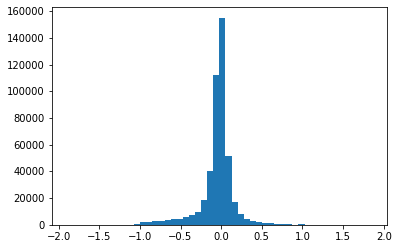

In [4]:
path = "./test/6/res_best_test.pt"
plt.hist(torch.load(path).detach().cpu().numpy(), bins = 50)

In [8]:
path = "./datasets/mat-cmpl/"


In [14]:
for file in os.listdir(path):
    if("_gt" in file):
        data = torch.load(os.path.join(path , file))
        print(data.shape , file)

torch.Size([1416, 1416]) Tower_of_London_gt.pt
torch.Size([1023, 1023]) Madrid_Metropolis_gt.pt
torch.Size([6456, 6456]) Piccadilly_gt.pt
torch.Size([2367, 2367]) Union_Square_gt.pt
torch.Size([1014, 1014]) Piazza_del_Popolo_gt.pt
torch.Size([1731, 1731]) Alamo_gt.pt
torch.Size([15174, 15174]) Trafalgar_gt.pt
torch.Size([996, 996]) NYC_Library_gt.pt
torch.Size([2031, 2031]) Gendarmenmarkt_gt.pt
torch.Size([3252, 3252]) Roman_Forum_gt.pt
torch.Size([681, 681]) Ellis_Island_gt.pt
torch.Size([1311, 1311]) Yorkminster_gt.pt
torch.Size([1659, 1659]) Notre_Dame_gt.pt
torch.Size([1350, 1350]) Montreal_Notre_Dame_gt.pt


In [22]:
path = "./test/8/X_output.mat"

In [23]:
data = scipy.io.loadmat(path)

In [36]:
mat = data['best']

In [43]:
mat[0:3,0:3]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [41]:
for i in range(0 , mat.shape[0] , 3):
    mat[i:i+3 , i:i+3]  = np.identity(3)

In [45]:
scipy.io.savemat("./test/8/X_output_.mat" , ndic)

In [6]:
path = "./test/10/best.npy"
data = torch.load(path).detach().cpu().numpy()

array([[ 5.3814638e-01, -3.5034567e-02,  6.3071814e-03, ...,
         5.3440209e-02, -1.9970534e-03, -1.5636298e-03],
       [-3.5423823e-02,  6.2225533e-01, -5.8258576e-03, ...,
        -3.8137906e-03,  7.3073603e-02, -5.1733772e-03],
       [ 6.2862816e-03, -4.4724206e-03,  5.3468829e-01, ...,
         4.2596832e-03,  2.1125346e-03,  5.4068156e-02],
       ...,
       [ 5.2964576e-02, -3.7215082e-03,  5.0652982e-03, ...,
         4.8693139e-03, -1.8508793e-04,  2.7915867e-04],
       [-1.9742325e-03,  7.3514387e-02,  3.3923367e-03, ...,
        -2.5629520e-04,  7.5704157e-03, -1.4950124e-04],
       [-1.4968181e-03, -5.3486321e-03,  5.3650420e-02, ...,
         2.0296194e-04, -2.4948470e-04,  5.1041883e-03]], dtype=float32)

In [5]:
os.listdir(path)

['best.npy',
 'res_best_test.pt',
 'events.out.tfevents.1642790735.brasov',
 'out.log',
 'source.zip',
 'res_best_train.pt',
 'config.toml',
 'meta.toml',
 'res_final_train.pt',
 'res_final_test.pt']

In [8]:
ndic = {"best":data }

In [9]:
scipy.io.savemat("./test/10/X_output_.mat" , ndic)

In [1]:
import pandas as pd

In [4]:
data = {'swaps': [{'amount0In': '7.237220406822259026', 'amount0Out': '0', 'amount1In': '0', 'amount1Out': '15926.075898', 'amountUSD': '15982.44610547115783973007523062402', 'id': '0xc4892ae548f1b8d3c6f932bd96503176c944795715c60b72643a3da49833134b-1', 'pair': {'token0': {'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 'symbol': 'WETH'}, 'token1': {'id': '0xdac17f958d2ee523a2206206994597c13d831ec7', 'symbol': 'USDT'}}, 'to': '0xade11f9f283aa032f0a5c01c37036d1b04f8ed27', 'transaction': {'id': '0xc4892ae548f1b8d3c6f932bd96503176c944795715c60b72643a3da49833134b', 'timestamp': '1643027680'}}, {'amount0In': '172995460786211562589.789917981', 'amount0Out': '0', 'amount1In': '0', 'amount1Out': '7.237220406822259026', 'amountUSD': '16007.45127973427623543252904201587', 'id': '0xc4892ae548f1b8d3c6f932bd96503176c944795715c60b72643a3da49833134b-0', 'pair': {'token0': {'id': '0x6adb2e268de2aa1abf6578e4a8119b960e02928f', 'symbol': 'ShibDoge'}, 'token1': {'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 'symbol': 'WETH'}}, 'to': '0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852', 'transaction': {'id': '0xc4892ae548f1b8d3c6f932bd96503176c944795715c60b72643a3da49833134b', 'timestamp': '1643027680'}}, {'amount0In': '0', 'amount0Out': '164.033140050623547066', 'amount1In': '0.01', 'amount1Out': '0', 'amountUSD': '22.11823100571131718421318206777445', 'id': '0xa8fe3bc6f10c11e9c9657545d3f26ab4147ac9023c2346d3566be36707c6df6b-0', 'pair': {'token0': {'id': '0xa5def515cfd373d17830e7c1de1639cb3530a112', 'symbol': 'DEPO'}, 'token1': {'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 'symbol': 'WETH'}}, 'to': '0x384f866f40f7c95fdd5b12f0793b0df7ed044a83', 'transaction': {'id': '0xa8fe3bc6f10c11e9c9657545d3f26ab4147ac9023c2346d3566be36707c6df6b', 'timestamp': '1643027680'}}]}

In [23]:
df = pd.DataFrame(columns=['a','b','c'])
for d in data['swaps']:
    a = d['amount0In']
    b = d['amount0Out']
    c = d['amount0Out']
    print(a)
    df.append({'a':"A" , 'b':"B" ,'c':"C"} , ignore_index=True)
#     

7.237220406822259026
172995460786211562589.789917981
0


In [25]:
df.append({'a':"A" , 'b':"B" ,'c':"C"} , ignore_index=True)

,a,b,c
0,A,B,C


In [18]:
import pandas as pd
  
# create an Empty DataFrame
# object With column names only
df = pd.DataFrame(columns = ['Name', 'Articles', 'Improved'])
print(df)
  
# append rows to an empty DataFrame
df = df.append({'Name' : 'Ankit', 'Articles' : 97, 'Improved' : 2200}, 
                ignore_index = True)
df = df.append({'Name' : 'Aishwary', 'Articles' : 30, 'Improved' : 50},
                ignore_index = True)
df = df.append({'Name' : 'yash', 'Articles' : 17, 'Improved' : 220},
               ignore_index = True)
  
df

Empty DataFrame
Columns: [Name, Articles, Improved]
Index: []


,Name,Articles,Improved
0,Ankit,97,2200
1,Aishwary,30,50
2,yash,17,220


In [26]:
df = pd.DataFrame(data=data['swaps'])

In [31]:
df.drop(columns =['pair'])

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,id,to,transaction
0,7.237220406822259026,0,0,15926.075898,15982.44610547115783973007523062402,0xc4892ae548f1b8d3c6f932bd96503176c944795715c6...,0xade11f9f283aa032f0a5c01c37036d1b04f8ed27,{'id': '0xc4892ae548f1b8d3c6f932bd96503176c944...
1,172995460786211562589.789917981,0,0,7.237220406822259026,16007.45127973427623543252904201587,0xc4892ae548f1b8d3c6f932bd96503176c944795715c6...,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,{'id': '0xc4892ae548f1b8d3c6f932bd96503176c944...
2,0,164.033140050623547066,0.01,0,22.11823100571131718421318206777445,0xa8fe3bc6f10c11e9c9657545d3f26ab4147ac9023c23...,0x384f866f40f7c95fdd5b12f0793b0df7ed044a83,{'id': '0xa8fe3bc6f10c11e9c9657545d3f26ab4147a...


In [28]:
data['swaps']

[{'amount0In': '7.237220406822259026',
  'amount0Out': '0',
  'amount1In': '0',
  'amount1Out': '15926.075898',
  'amountUSD': '15982.44610547115783973007523062402',
  'id': '0xc4892ae548f1b8d3c6f932bd96503176c944795715c60b72643a3da49833134b-1',
  'pair': {'token0': {'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
    'symbol': 'WETH'},
   'token1': {'id': '0xdac17f958d2ee523a2206206994597c13d831ec7',
    'symbol': 'USDT'}},
  'to': '0xade11f9f283aa032f0a5c01c37036d1b04f8ed27',
  'transaction': {'id': '0xc4892ae548f1b8d3c6f932bd96503176c944795715c60b72643a3da49833134b',
   'timestamp': '1643027680'}},
 {'amount0In': '172995460786211562589.789917981',
  'amount0Out': '0',
  'amount1In': '0',
  'amount1Out': '7.237220406822259026',
  'amountUSD': '16007.45127973427623543252904201587',
  'id': '0xc4892ae548f1b8d3c6f932bd96503176c944795715c60b72643a3da49833134b-0',
  'pair': {'token0': {'id': '0x6adb2e268de2aa1abf6578e4a8119b960e02928f',
    'symbol': 'ShibDoge'},
   'token1': {'id': '